In [ ]:
import zipfile

In [ ]:
archive = zipfile.ZipFile("images.zip", mode="r")
archive.extractall("directorio")

In [ ]:
#(1) instalamos tesseract, ya que no se encuentra incluido.
!sudo apt install tesseract-ocr


#(2) instalación de pytesseract.
!pip install pytesseract

In [ ]:
#(3) importamos kraken manualmente
!pip install kraken==2.0.1

In [ ]:
#(1) importamos el paquete cv de la librería OpenCV.
import cv2 as cv


#(2) cargamos los clasificadores en cascada que vamos a usar.
cara_cascada = cv.CascadeClassifier("haarcascade_frontalface_default.xml")


Describe the word that we will look for in the newspaper images of the zip file = Mark


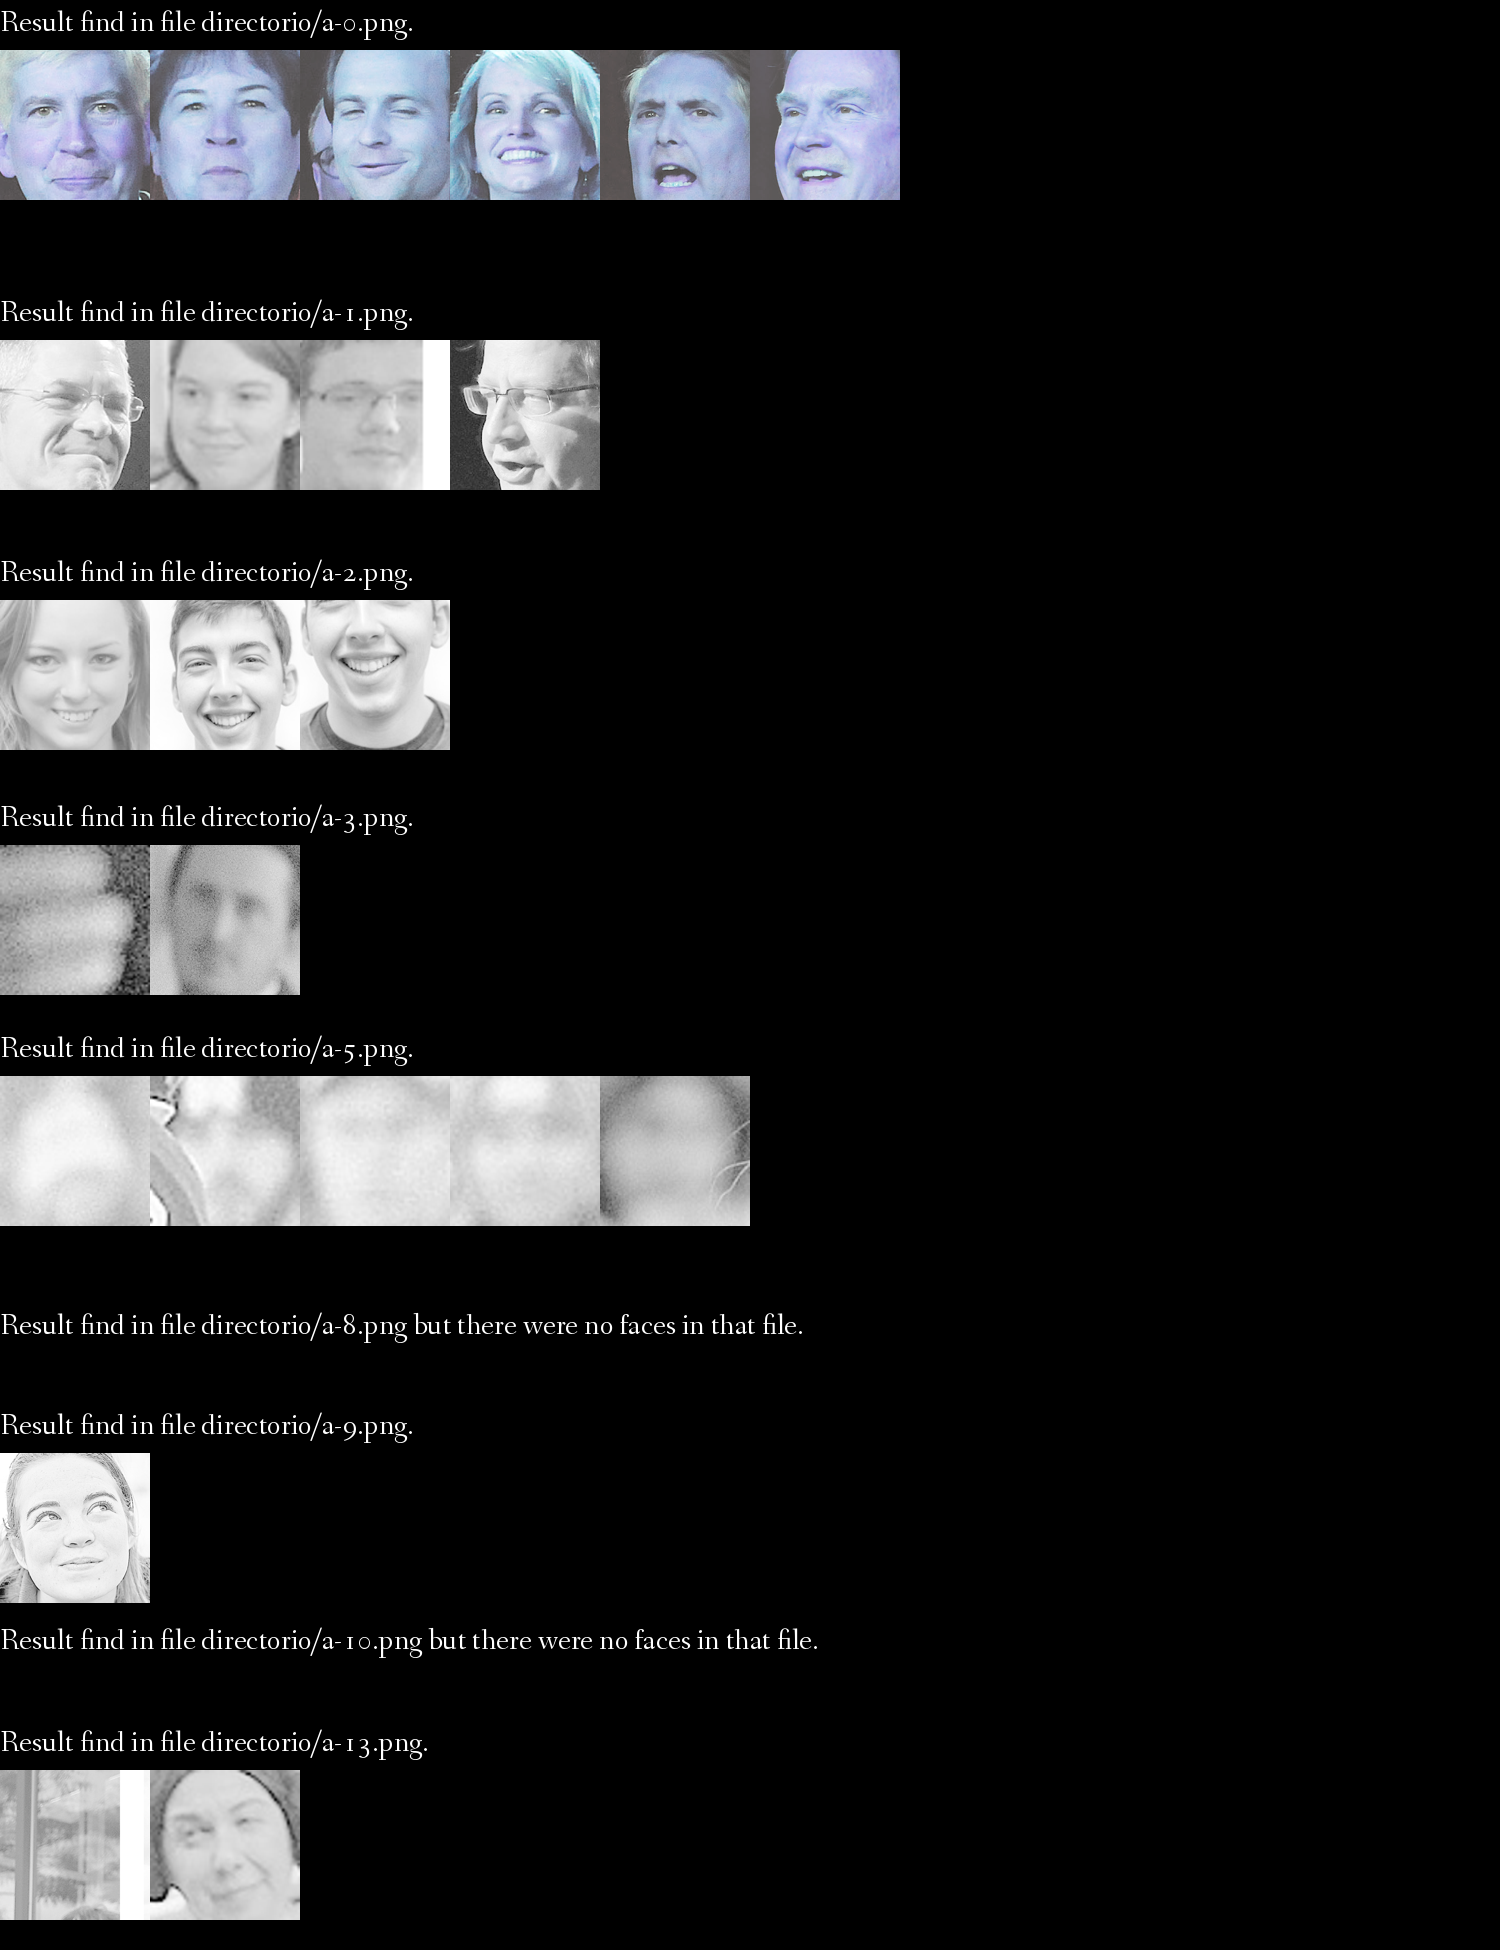

In [ ]:
#(1) We import the PIL image library.
import PIL


#(2) we import the Image module from the PIL image library.
from PIL import Image


#(3) we import the display function, which allows us to display the images on the screen.
from IPython.display import display


#(4) we import the ImageDraw module from the PIL image library.
from PIL import ImageDraw


#(5) We import the ImageFont module from the PIL image library.
from PIL import ImageFont


#(6) We import the pytesseract package.
import pytesseract


#(7) we import the kraken package.
import kraken


#(8) we create a function to iterate over the files.
def funcion(direccion, palabra):  

  
    imagen_matricial = cv.imread(direccion)
    gris = cv.cvtColor(imagen_matricial, cv.COLOR_BGR2GRAY)
    caras = cara_cascada.detectMultiScale(gris,1.35,4)
    palabra=palabra.lower()

  
    imagen = Image.fromarray(imagen_matricial, "RGB")
    imagen_gris = Image.fromarray(gris, "L")

  
    texto_caras = pytesseract.image_to_string(imagen_gris).lower()
    lista = list(caras)

    fuente = ImageFont.truetype("fanwood-webfont.ttf", size=30)


    if palabra not in texto_caras:
        hoja_contacto=(PIL.Image).new("RGB", (1500,1))
        #hoja_contacto=(PIL.Image).new("RGB", (1500,100))
        #dibujo = ImageDraw.Draw(hoja_contacto)
        #dibujo.text((0,10), text=f"En el archivo {direccion} no encontramos la palabra indicada", font = fuente, color="black")
        

  
    elif palabra in texto_caras and len(lista)==0:
        hoja_contacto=(PIL.Image).new("RGB", (1500,100))
        dibujo = ImageDraw.Draw(hoja_contacto)
        dibujo.text((0,10), text=f"Result find in file {direccion} but there were no faces in that file.", font = fuente, color="black")
   


    elif palabra in texto_caras and len(lista)>0:
        hoja_contacto=(PIL.Image).new("RGB", (1500,15*len(lista)+200))
        dibujo = ImageDraw.Draw(hoja_contacto)
        dibujo.text((0,10), text=f"Result find in file {direccion}.", font = fuente, color="black")

  
        lista_caras=[]  
        for rectangulo in lista:
            x= rectangulo[0]
            y= rectangulo[1]
            w= rectangulo[2]
            h= rectangulo[3]
            cuadro=(imagen).crop((x,y,x+w,y+h))
            lista_caras.append(cuadro.resize((150,150)))


        (a,b)=(0,0)
        for t in lista_caras:   
            (hoja_contacto).paste(t,(a, b+50))

            if a+150 < (hoja_contacto).width:
              a=a+150
    
            elif a+150 == (hoja_contacto).width:
              a=0
              b=b+150

    return hoja_contacto


palabra= input("Describe the word that we will look for in the newspaper images of the zip file = ")


superconjunto=[]
for i in range(0,14):
    superconjunto.append(funcion(f"directorio/a-{i}.png", palabra.lower()))


altura=0
for x in superconjunto:
    altura +=x.height



superhoja=(PIL.Image).new("RGB", (1500, altura))


h=0
for x in superconjunto:
    (superhoja).paste(x,(0,h))
    h += x.height



display(superhoja)

